In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, ttest_ind, ttest_rel, ttest_1samp
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

In [2]:
data = pd.read_csv('scaler_apollo_hospitals.csv', index_col=0)
data.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667


In [3]:
data.shape

(1338, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1338 non-null   int64  
 1   sex                      1338 non-null   object 
 2   smoker                   1338 non-null   object 
 3   region                   1338 non-null   object 
 4   viral load               1338 non-null   float64
 5   severity level           1338 non-null   int64  
 6   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 83.6+ KB


In [5]:
data.isna().sum()

age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64

In [6]:
#From above, we can say there are no missing values in the dataset.

In [7]:
data.describe()

,age,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,10.221233,1.094918,33176.058296
std,14.049960,2.032796,1.205493,30275.029296
min,18.000000,5.320000,0.000000,2805.000000
25%,27.000000,8.762500,0.000000,11851.000000
50%,39.000000,10.130000,1.000000,23455.000000
75%,51.000000,11.567500,2.000000,41599.500000
max,64.000000,17.710000,5.000000,159426.000000


In [8]:
#data_type of each features
data.dtypes

age                          int64
sex                         object
smoker                      object
region                      object
viral load                 float64
severity level               int64
hospitalization charges      int64
dtype: object

In [9]:
def univariate_plot(x,y):
  fig = plt.figure(figsize=(15,5))
  ax2 = fig.add_subplot(121)
  sns.boxplot(x,ax=ax2, data = data)
  ax = fig.add_subplot(122)
  sns.histplot(x,kde=True,ax=ax)
  ax.axvline(x.mean(), color='orange', linestyle='-',linewidth=1.5)
  ax.axvline(x.median(), color='red', linestyle='-.',linewidth=1.5)
  ax.axvline(x.mode()[0], color='green', linestyle='--',linewidth=1.5)
  ax.legend(labels=['kde','mean','median','mode'])
  ax.set_title(str(y))
  ax2.set_title(str(y))
  plt.show()

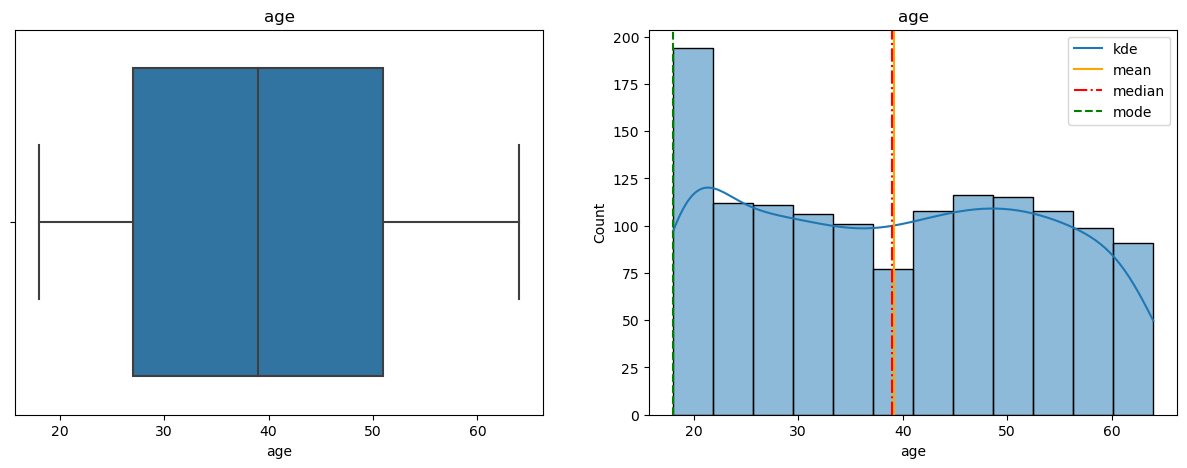

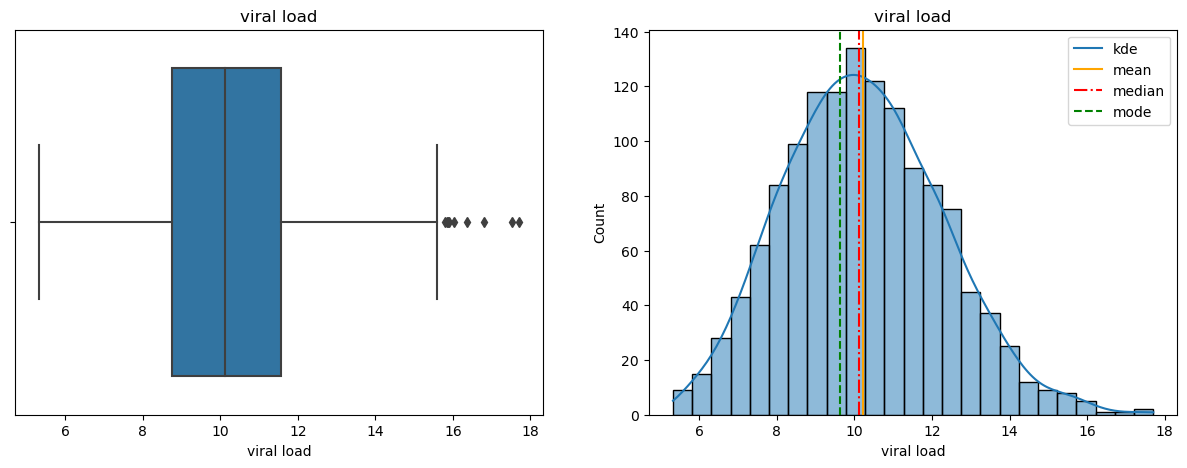

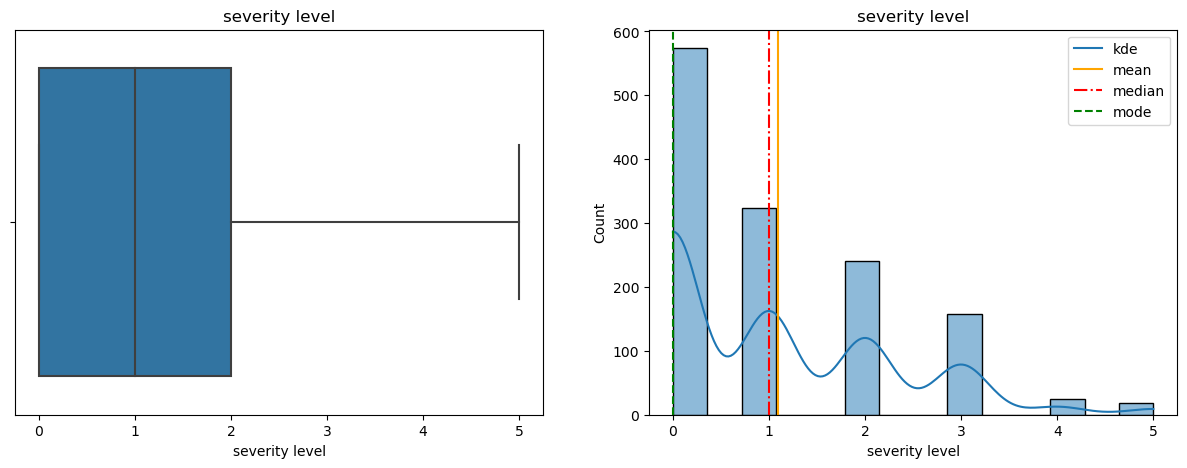

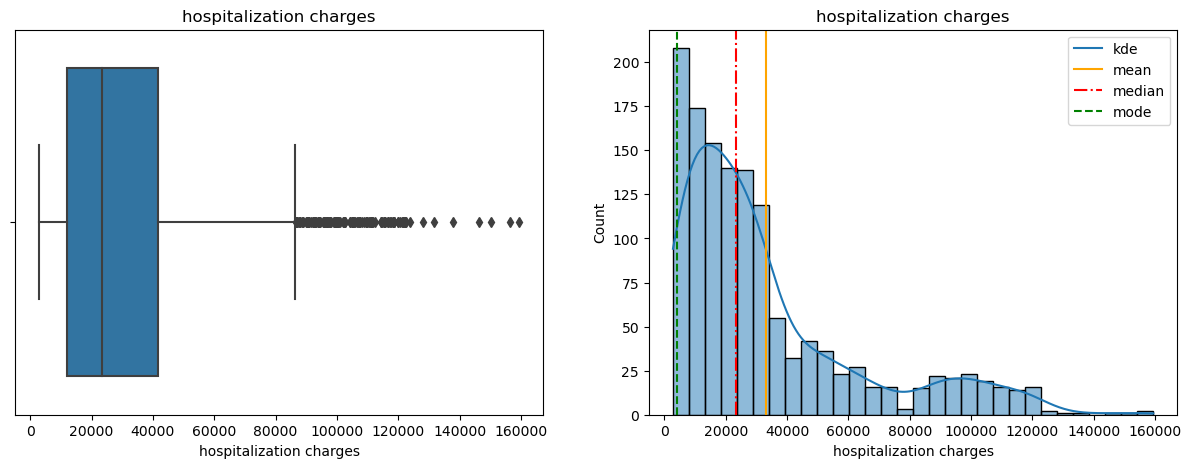

In [10]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

for i in list(data.select_dtypes(include=["number"]).columns):
  univariate_plot(data[i],i)

<AxesSubplot:xlabel='sex', ylabel='count'>

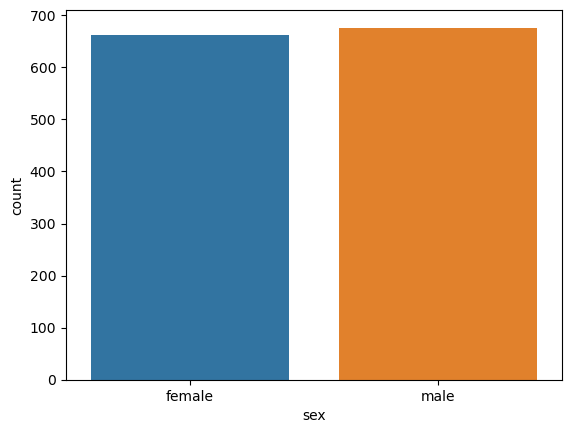

In [11]:
sns.countplot('sex', data = data)
# From this plot, we can infer that we have balenced data in terms of sex.

<AxesSubplot:xlabel='smoker', ylabel='count'>

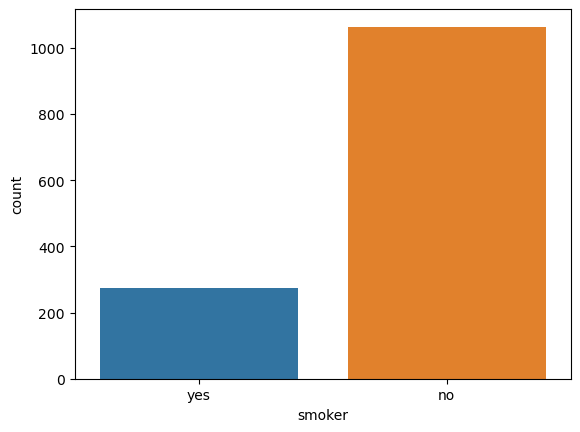

In [12]:
sns.countplot('smoker', data = data)
# From this plot, we can infer that we have un-balenced data for smoker.

<AxesSubplot:xlabel='region', ylabel='count'>

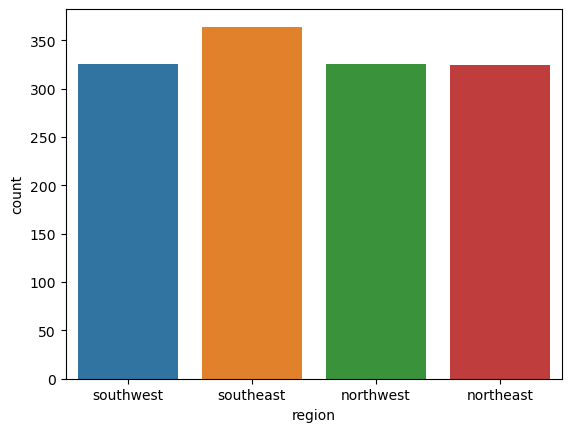

In [13]:
sns.countplot('region', data = data)
# From this plot, we can infer that we have almost balenced data for all 4 regions.

<AxesSubplot:xlabel='region', ylabel='hospitalization charges'>

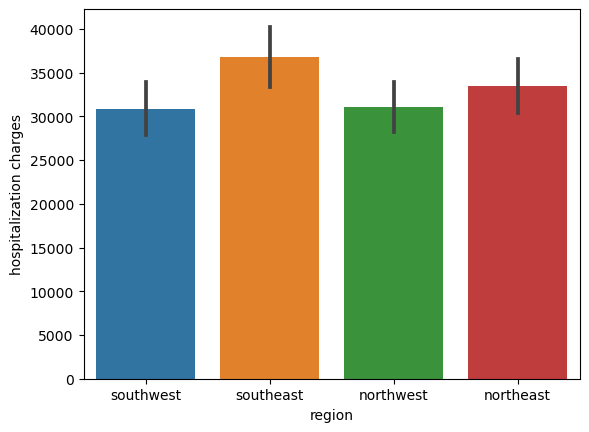

In [14]:
sns.barplot(x = data['region'], y = data['hospitalization charges'], data = data)

In [15]:
# sns.boxplot(x = data['region'], y = data['hospitalization charges'], data = data,palette='rainbow')
# sns.violinplot(x = data['region'], y = data['hospitalization charges'], data = data,palette='rainbow')
# sns.stripplot(x = data['region'], y = data['hospitalization charges'], data = data)
# sns.swarmplot(x = data['region'], y = data['hospitalization charges'], data = data)
def uni_plot(x,y):
  fig = plt.figure(figsize=(28,5))
  ax1 = fig.add_subplot(131)
  name = x.name
  title = f"{name} Vs hospitalization charges"
  fig.suptitle(title)
  sns.boxplot(x,y,ax=ax1, data = data, fliersize=3, palette='rainbow')
  ax2 = fig.add_subplot(132)
  sns.violinplot(x,y,ax=ax2, data = data, palette='rainbow')
  ax4 = fig.add_subplot(133)
  sns.swarmplot(x,y,ax=ax4, data = data)
  plt.show()

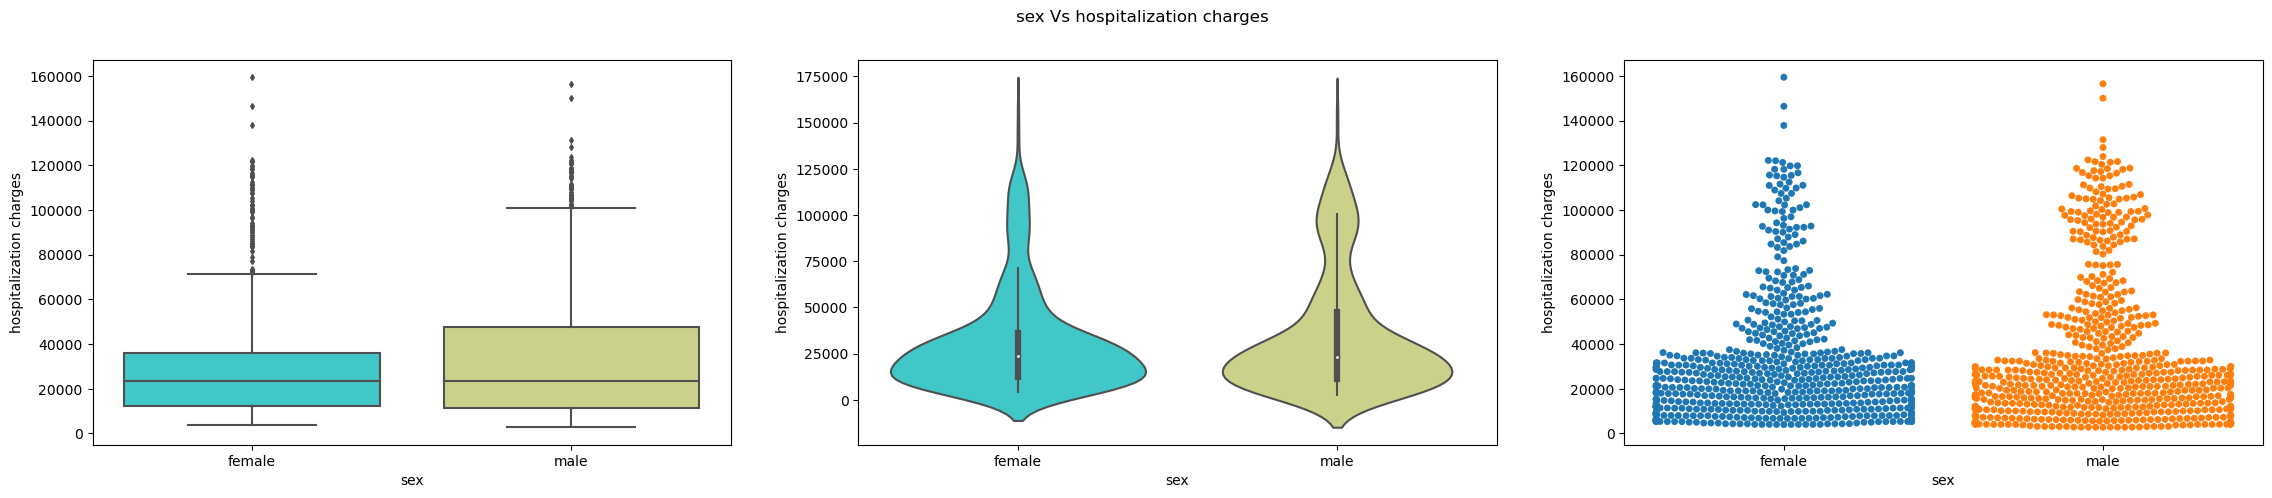

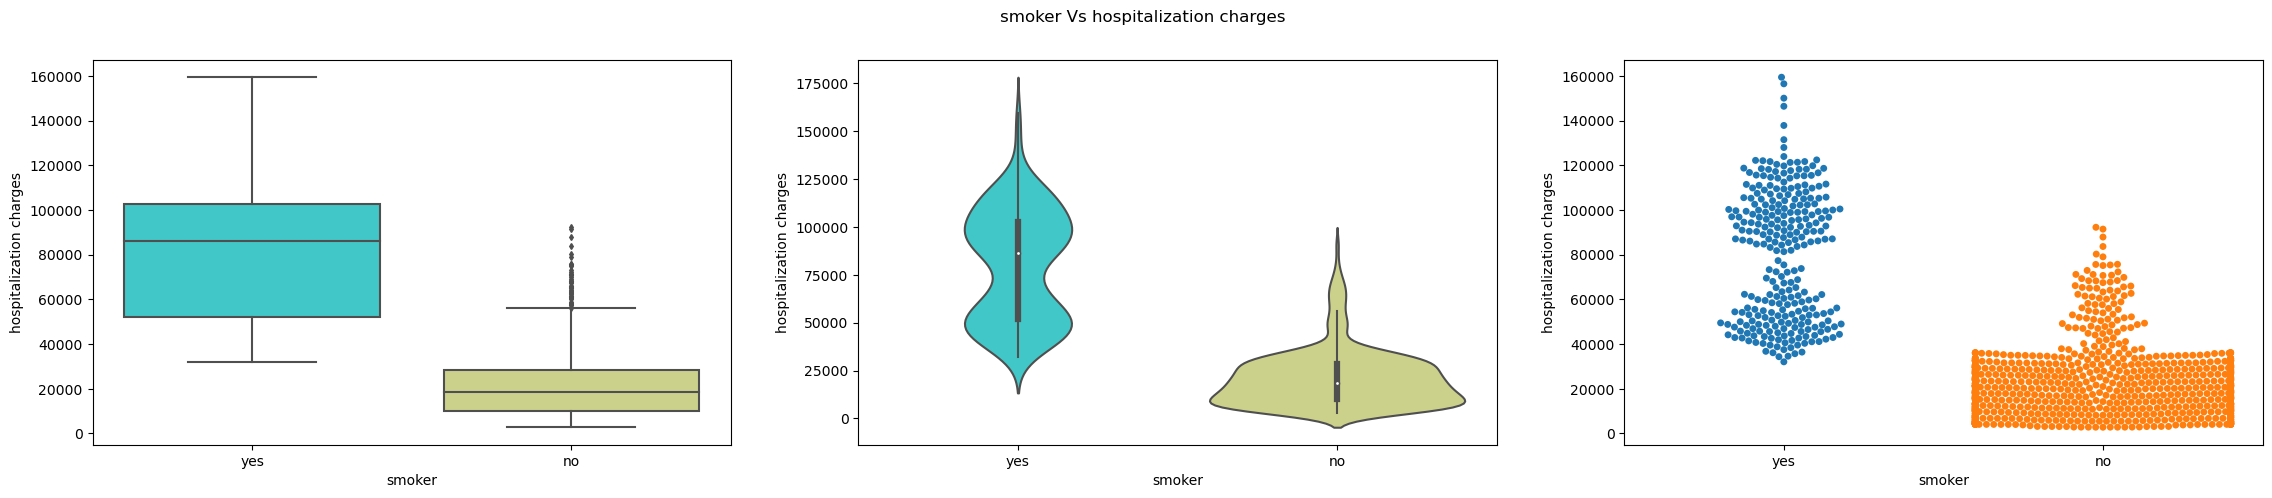

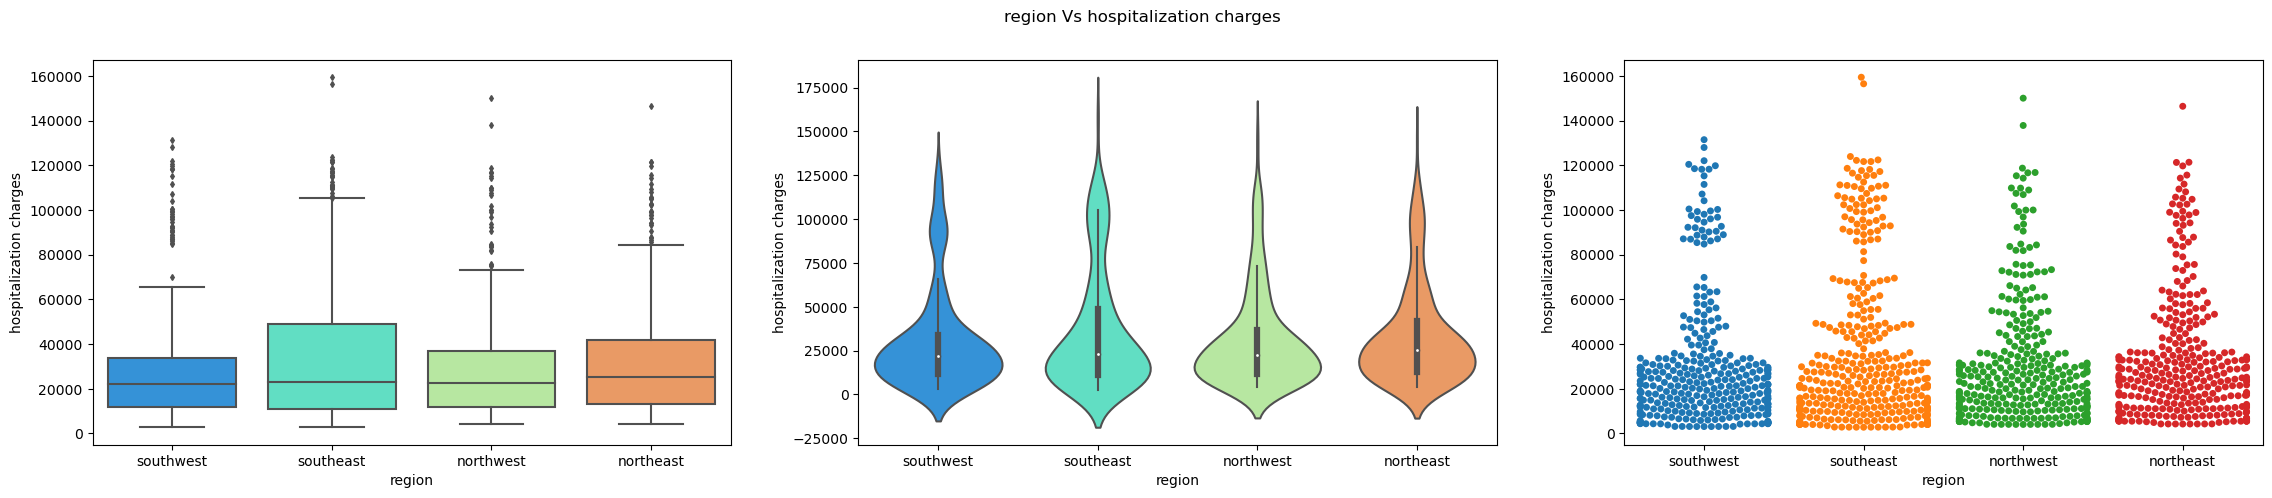

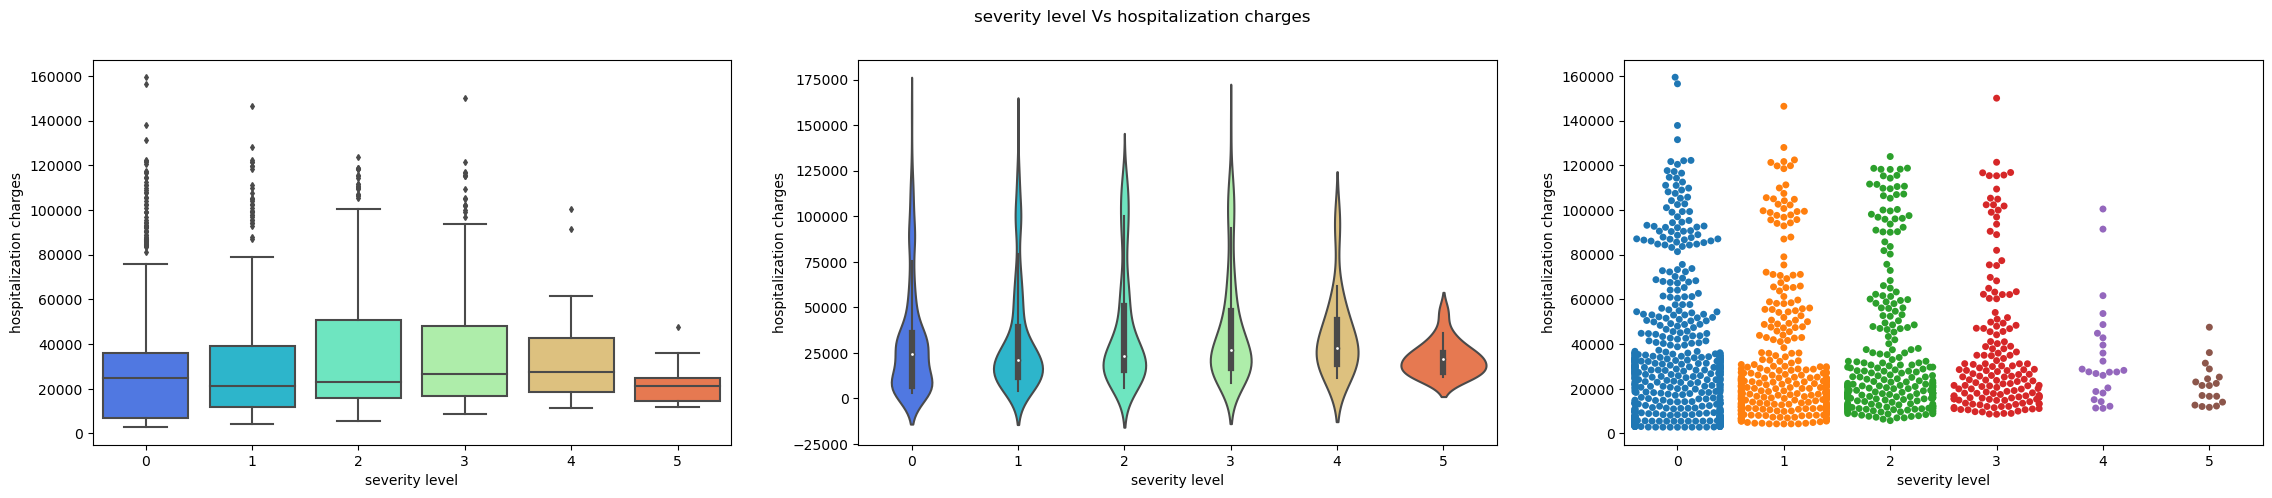

In [16]:
import warnings
warnings.filterwarnings('ignore')

columns = ['sex', 'smoker', 'region', 'severity level']
for col in columns:
    uni_plot(x = data[col], y = data['hospitalization charges'])
    print()

In [17]:
#1. from above we can infer that hospitalization charges for both sex is almost same for 50% of the data but above 50% (median),
#hospitalization charges for male is higher than female.
#2. hospitalization charges for smoker is higher than non-smoker.
#3. median hospitalization charges for all 4 region is almost same.

In [18]:
# missing value treatment for viral load feature
# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(data['viral load'], 10)
ninetieth_percentile = np.percentile(data['viral load'], 90)

outlier1 = data[data['viral load']<tenth_percentile]
outlier2 = data[data['viral load']>ninetieth_percentile]
new_data = data[(data['viral load']>=tenth_percentile) & (data['viral load']<=ninetieth_percentile)]
print("Shape of data after outlier treatment:",new_data.shape)

Shape of data after outlier treatment: (1071, 7)


In [19]:
new_data.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
4,32,male,no,northwest,9.63,0,9667
5,31,female,no,southeast,8.58,0,9392


In [20]:
data['smoker'] = data['smoker'].replace({'yes':1, 'no':0})
data.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,1,southwest,9.30,0,42212
1,18,male,0,southeast,11.26,1,4314
2,28,male,0,southeast,11.00,3,11124
3,33,male,0,northwest,7.57,0,54961
4,32,male,0,northwest,9.63,0,9667


In [21]:
# Prove (or disprove) that the hospitalization charges of people who do smoking are greater than those who don't? 

# To check hospitalization charges of people who do smoking are greater than those who don't
# H0 - hospitalization charges of people who do smoking are same as who don't smoke
# H1 - hospitalization charges of people who do smoking are greater than those who don't
# Using 2 sample right tailed T-Test

print(np.mean(data[data['smoker']==1]['hospitalization charges']))
print(np.mean(data[data['smoker']==0]['hospitalization charges']))

print(np.var(data[data['smoker']==1]['hospitalization charges']))
print(np.var(data[data['smoker']==0]['hospitalization charges']))


stats, p_val = ttest_ind(data['hospitalization charges'], data['smoker'])
print(f'stats: {stats}, p_val: {p_val}')
alpha = 0.05
if p_val<=alpha:
    print("Conclusion: hospitalization charges of people who do smoking are greater than those who don't")

else:
    print("hospitalization charges of people who do smoking are same as who don't smoke")

# As p-val is very less than alpha (assuming .05 here), so we can reject the null hypothesis.
# So we can say that hospitalization charges of people who do smoking are greater than those who don't

80125.57299270073
21085.6757518797
829508540.9016069
224322878.53678074
stats: 40.08349568304926, p_val: 1.5211505122474403e-275
Conclusion: hospitalization charges of people who do smoking are greater than those who don't


In [22]:
data['sex'] = data['sex'].replace({'male':1, 'female':0})
data.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,0,1,southwest,9.30,0,42212
1,18,1,0,southeast,11.26,1,4314
2,28,1,0,southeast,11.00,3,11124
3,33,1,0,northwest,7.57,0,54961
4,32,1,0,northwest,9.63,0,9667


In [23]:
# Prove (or disprove) with statistical evidence that the viral load of females is different from that of males 

# To check viral load of females is different from that of males
# H0 - viral load of females is same as of males
# H1 - viral load of females is different from that of males
# Using two tailed T-Test

print(np.mean(data[data['sex']==1]['viral load']))
print(np.mean(data[data['sex']==0]['viral load']))

print(np.var(data[data['sex']==1]['viral load']))
print(np.var(data[data['sex']==0]['viral load']))

stats, p_val = ttest_ind(data['viral load'], data['sex'])
print(f'stats: {stats}, p_val: {p_val}')
alpha = 0.05
if p_val<=alpha:
    print("Conclusion: viral load of females is different from that of males")

else:
    print("Conclusion: viral load of females is same as of males")

# As p-val is very less than alpha (assuming .05 here), so we can reject the null hypothesis.
# So we can say that viral load of females is different from that of males

10.314423076923074
10.126072507552859
4.183557507396447
4.055708441872559
stats: 169.7691360550067, p_val: 0.0
Conclusion: viral load of females is different from that of males


In [24]:
# Is the proportion of smoking significantly different across different regions?

# To check viral load of females is different from that of males
# H0 - proportion of smoking significantly different across different regions
# H1 - proportion of smoking significantly same across different regions
# Using chi square test


x = pd.crosstab(data.smoker, data.region, margins = False)
x.columns = ["northeast", "northwest", "southeast", "southwest"]
x.index = [0, 1]
print(x)
stat, p_val, dof, expected = chi2_contingency(x)
print(f"chi_stat: {stat}, p-value: {p_val}")


alpha = 0.05
if p_val<=alpha:
    print("Conclusion: proportion of smoking significantly same across different regions")

else:
    print("Conclusion: proportion of smoking significantly different across different regions")

# As p-val is very less than alpha (assuming .05 here), so we can reject the null hypothesis.
# So we can say that proportion of smoking significantly different across different regions

   northeast  northwest  southeast  southwest
0        257        267        273        267
1         67         58         91         58
chi_stat: 7.34347776140707, p-value: 0.06171954839170547
Conclusion: proportion of smoking significantly different across different regions


In [25]:
data['severity level'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: severity level, dtype: int64

In [26]:
# Is the mean viral load of women with 0 Severity level, 1 Severity level, and 2 Severity level the same? Explain your answer with statistical evidence

# To check viral load of females is different from that of males
# H0 - The mean of all 3 severity level will be same
# H1 - The mean of all 3 severity level won't be same
# Using chi square test


gp1 = data[data['severity level']==0]['viral load']
gp2 = data[data['severity level']==1]['viral load']
gp3 = data[data['severity level']==2]['viral load']


stat, p_val = f_oneway(gp1, gp2, gp3)
print(f"anova_stat: {stat}, p-value: {p_val}")


alpha = 0.05
if p_val<=alpha:
    print("Conclusion: The mean of all 3 severity level won't be same")

else:
    print("Conclusion: The mean of all 3 severity level will be same")

# As p-val is very less than alpha (assuming .05 here), so we can reject the null hypothesis.
# So we can say that, mean of all 3 severity level will be same

anova_stat: 0.4160938798650393, p-value: 0.6597189200969209
Conclusion: The mean of all 3 severity level will be same


<AxesSubplot:>

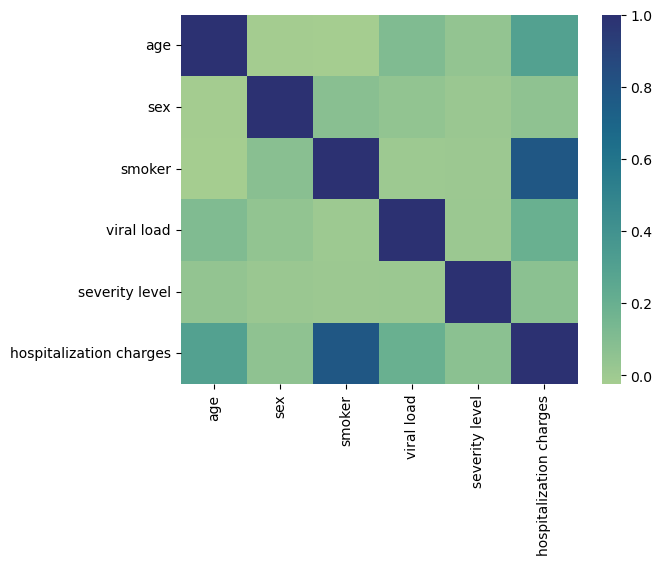

In [27]:
sns.heatmap(data.corr(), cmap='crest')

<AxesSubplot:xlabel='age', ylabel='hospitalization charges'>

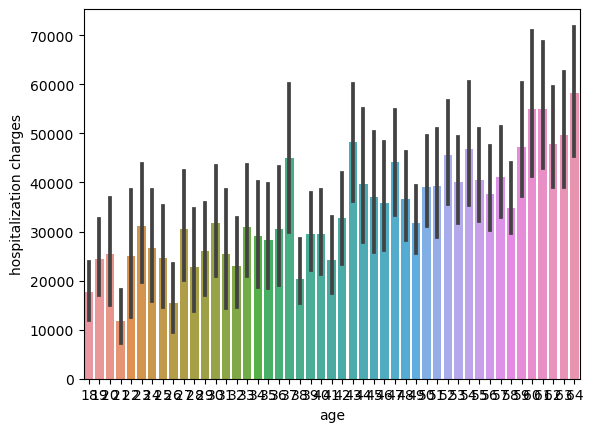

In [33]:
sns.barplot(x = 'age', y = 'hospitalization charges', data = data)